<a href="https://colab.research.google.com/github/anhhao04/NguyenAnhHao-20104006.github.io/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/FL

/content/drive/MyDrive/Colab Notebooks/FL


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FL/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 177 images belonging to 3 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FL/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 177 images belonging to 3 classes.


In [ ]:
x_train.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [ ]:
validation.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
6/6 [==============================] - 41s 7s/step - loss: 3.6260 - accuracy: 0.4124 - val_loss: 0.8095 - val_accuracy: 0.5650
Epoch 2/100
6/6 [==============================] - 54s 10s/step - loss: 0.7940 - accuracy: 0.6215 - val_loss: 0.6252 - val_accuracy: 0.6836
Epoch 3/100
6/6 [==============================] - 38s 7s/step - loss: 0.7264 - accuracy: 0.6780 - val_loss: 0.5111 - val_accuracy: 0.8192
Epoch 4/100
6/6 [==============================] - 41s 7s/step - loss: 0.5395 - accuracy: 0.7853 - val_loss: 0.4577 - val_accuracy: 0.8362
Epoch 5/100
6/6 [==============================] - 42s 8s/step - loss: 0.3683 - accuracy: 0.8870 - val_loss: 0.3311 - val_accuracy: 0.8644
Epoch 6/100
6/6 [==============================] - 36s 6s/step - loss: 0.4526 - accuracy: 0.8418 - val_loss: 0.3642 - val_accuracy: 0.8757
Epoch 7/100
6/6 [==============================] - 35s 6s/step - loss: 0.3422 - accuracy: 0.8588 - val_loss: 0.2337 - val_accuracy: 0.9322
Epoch 8/100
6/6 [=========

In [ ]:
Score=model.evaluate(x_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.06481973826885223
Train Accuracy 0.9830508232116699


<function matplotlib.pyplot.show(*args, **kw)>

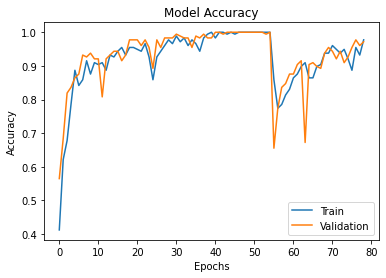

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Hoa.h5")

In [ ]:
model_CNN=load_model('Hoa.h5')

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/FL/Test/Test1"

1/1 [==============================] - 0s 183ms/step
CAM TU CAU


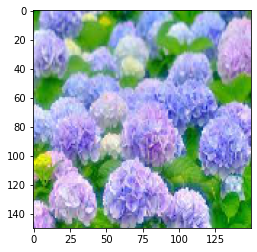

1/1 [==============================] - 0s 64ms/step
HOA CUC


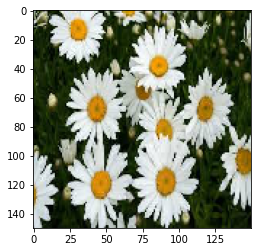

1/1 [==============================] - 0s 73ms/step
HOA LAN


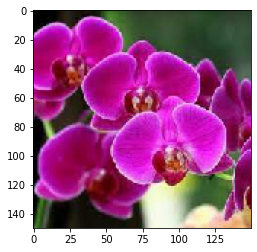

1/1 [==============================] - 0s 86ms/step
CAM TU CAU


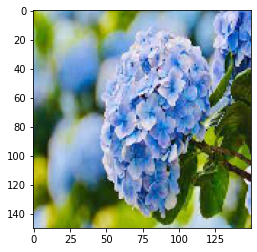

1/1 [==============================] - 0s 61ms/step
HOA LAN


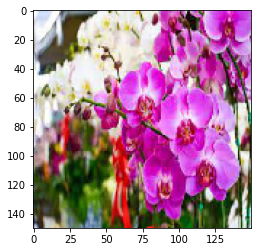

1/1 [==============================] - 0s 59ms/step
HOA CUC


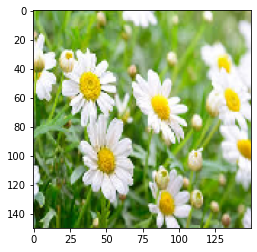

In [ ]:
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='CAM TU CAU'
  if round(result[0][1])==1:
    prediction='HOA CUC'
  if round(result[0][2])==1:
    prediction='HOA LAN'
  print(prediction)
  plt.show()